In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [8]:
observations=100
xs=np.random.uniform(-10,10,(observations,1))
zs=np.random.uniform(-10,10,(observations,1))
generated_inputs=np.column_stack((xs,zs))
noise=np.random.uniform(-1,1,(observations,1))
generated_targets=2*xs-3*zs+5+noise
np.savez("8_TF_intro",inputs=generated_inputs,targets=generated_targets)


In [9]:
#lets load the data
training_data=np.load("8_TF_intro.npz")

In [38]:
#lets define input and output size
input_size=2
output_size=1

#lets ley the model.....we can also give custome initial weights(kernel) and biase
model=tf.keras.Sequential([
    tf.keras.layers.Dense(output_size,
                          kernel_initializer=tf.random_uniform_initializer(minval=-0.1,maxval=0.1),
                          bias_initializer=tf.random_uniform_initializer(minval=-0.1,maxval=0.1)

                         )
])

#lets give optimizer and loss 

custom_optimizer=tf.keras.optimizers.SGD(learning_rate=0.02)
model.compile(optimizer=custom_optimizer,loss='mean_squared_error')
#model.compile(optimizer='sgd',loss='mean_squared_error')

#lets fit the input,iterations,verbos in model
model.fit(training_data['inputs'],training_data['targets'],epochs=100,verbose=2)



Epoch 1/100
4/4 - 0s - loss: 295.8962
Epoch 2/100
4/4 - 0s - loss: 31.1344
Epoch 3/100
4/4 - 0s - loss: 23.8423
Epoch 4/100
4/4 - 0s - loss: 9.5145
Epoch 5/100
4/4 - 0s - loss: 10.2141
Epoch 6/100
4/4 - 0s - loss: 7.0567
Epoch 7/100
4/4 - 0s - loss: 5.8218
Epoch 8/100
4/4 - 0s - loss: 6.8418
Epoch 9/100
4/4 - 0s - loss: 2.9015
Epoch 10/100
4/4 - 0s - loss: 5.6587
Epoch 11/100
4/4 - 0s - loss: 1.1802
Epoch 12/100
4/4 - 0s - loss: 1.7865
Epoch 13/100
4/4 - 0s - loss: 1.5656
Epoch 14/100
4/4 - 0s - loss: 0.7393
Epoch 15/100
4/4 - 0s - loss: 1.8080
Epoch 16/100
4/4 - 0s - loss: 0.5496
Epoch 17/100
4/4 - 0s - loss: 0.8134
Epoch 18/100
4/4 - 0s - loss: 0.6827
Epoch 19/100
4/4 - 0s - loss: 0.4528
Epoch 20/100
4/4 - 0s - loss: 0.4121
Epoch 21/100
4/4 - 0s - loss: 0.6521
Epoch 22/100
4/4 - 0s - loss: 0.4865
Epoch 23/100
4/4 - 0s - loss: 0.8137
Epoch 24/100
4/4 - 0s - loss: 0.3876
Epoch 25/100
4/4 - 0s - loss: 1.1160
Epoch 26/100
4/4 - 0s - loss: 0.3575
Epoch 27/100
4/4 - 0s - loss: 0.5070
Epoch

In [39]:
weights=model.layers[0].get_weights()
weights

[array([[ 1.9206209],
        [-2.8848784]], dtype=float32),
 array([5.125856], dtype=float32)]

In [40]:
print('weights of features = ',*weights[0])
print('biase = ',weights[1])

weights of features =  [1.9206209] [-2.8848784]
biase =  [5.125856]


In [41]:
#lets predict the values
outputs=model.predict_on_batch(training_data['inputs'])
outputs

array([[ 13.416634  ],
       [ 10.025494  ],
       [-24.989933  ],
       [-18.210148  ],
       [ -3.0260892 ],
       [ 13.132883  ],
       [ 31.924784  ],
       [  2.063951  ],
       [ -7.151402  ],
       [ 12.730869  ],
       [ -1.8195739 ],
       [-20.302244  ],
       [-29.439787  ],
       [  1.1238861 ],
       [ 41.461517  ],
       [ 37.798737  ],
       [ -9.637831  ],
       [-19.509542  ],
       [-22.182245  ],
       [ -3.4201837 ],
       [ 13.776981  ],
       [ 18.87494   ],
       [ 13.454939  ],
       [ 46.50683   ],
       [ 41.48345   ],
       [ 33.574986  ],
       [  3.7567196 ],
       [ -6.4057937 ],
       [ 40.372616  ],
       [ 30.362772  ],
       [ -4.302422  ],
       [ -1.6316195 ],
       [ -3.766169  ],
       [  0.69504213],
       [ 11.185829  ],
       [ 22.353132  ],
       [ 18.04034   ],
       [ 40.58204   ],
       [ 11.317045  ],
       [-10.19668   ],
       [  1.3834486 ],
       [ 16.650639  ],
       [  2.6963043 ],
       [ -5

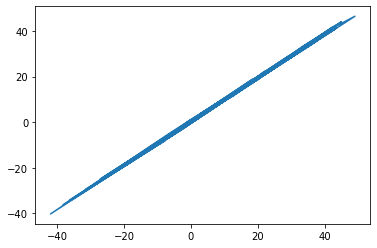

In [42]:
plt.plot(training_data['targets'],outputs)